### WebブラウザでWSIをみる


In [1]:
%pwd

'/work/openslide/notebooks'

In [2]:
%cd ../src/openslide-python/examples/deepzoom

/work/openslide/src/openslide-python/examples/deepzoom


In [ ]:
# このコマンドを叩いて表示されるURLにアクセスすると、指定したDir内にあるWSIにアクセスできる
!python3 deepzoom_multiserver.py -Q 100 ../../../../input

In [3]:
import os
import openslide
from openslide.deepzoom import DeepZoomGenerator

## Scale down images

* トレーニングデータセットを一般的なフォーマットの小さな画像に変換
* WSIでフィルタリングを行う前に、幅と高さを32倍に縮小することにより、1/1024の画像データに対してフィルタリングを行うことができる
* 500枚のsvsファイルを1/32スケールのpngファイルに変換するには、一般的なMacBook Proで以下のコードを使って約12分かかる

In [4]:
path = '../../../../input/sample.ndpi'
sample_slide = openslide.open_slide(path)

In [5]:
# 情報を見る
sample_slide.properties

<_PropertyMap {'hamamatsu.AHEX[0]': '803B205EBC1E7C411C6AB8237C37185DC020802D145ABC1C7827144BB80F7D051021B91E74220C4DB80974010C22B50D75050819B91E711F0406B93375210D05BD2C743A0C64BC1F7C39106ABC2181051819C1147D1C1C10C119800A1C2DC5088A66', 'hamamatsu.AHEX[0].fluorescence': '006F006B005F007300730067006700670067005B005F005F004F004F004F001F00230017004B004F0047002300270027001B001700170107000001070107010700000067006700670067006B0067001F001F0023000000130017002F002F00330F5B', 'hamamatsu.AHEX[0].ploidy': '8037245BB41978412063B01F78371857B421742F1057B01B6C270C4BAC117107081FAD1F6823044BA80B6800081FA90D65070017AD1D65230000A9336923090BB12D6C370C5FB0217435145FB4237D0B1C0FB51379232407B91B7C032423BD093E26', 'hamamatsu.AHEX[1]': '883E2C62C02184442869C0258839245DC424882E205BC01F802E204FC01684031C24BD158028184EC00F7C071827BD087D011419C119791B1008BD2F7D1D1901C1277C3C1864C41F843C2067C4238800241BC51085172811C5168811282EC905307B', 'hamamatsu.AHEX[1].fluorescence': '0073006F0063007700770067006700670067005F006300

In [28]:
# 個別のpropertiesパラメータの確認
sample_slide.properties[openslide.PROPERTY_NAME_OBJECTIVE_POWER]

'40'

In [6]:
# スライドのレベル数
# 0: 最高解像度、-1: 最低解像度
sample_slide.level_count

9

In [30]:
sample_slide.level_count - 1

8

In [7]:
# サイズを確認（w, h）
sample_slide.dimensions

(139264, 59136)

In [8]:
# レベルごとのサイズを確認
sample_slide.level_dimensions

((139264, 59136),
 (69632, 29568),
 (34816, 14784),
 (17408, 7392),
 (8704, 3696),
 (4352, 1848),
 (2176, 924),
 (1088, 462),
 (544, 231))

In [9]:
# 各レベルのダウンサンプル係数のリスト
sample_slide.level_downsamples

(1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 256.0)

In [10]:
# 関連づけられている画像を確認（おそらくはルーペ像）
sample_slide.associated_images

<_AssociatedImageMap {'macro': <PIL.Image.Image image mode=RGBA size=1187x406 at 0x7FE904064F90>}>

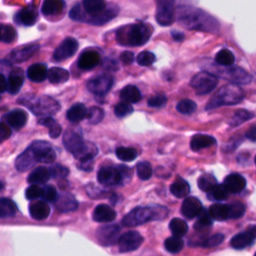

In [11]:
# 指定した領域の画像を見る
# read_region(レベル0の左上からの座標：tuple(x, y), level, 領域のサイズ:tuple(w, h))
sample_slide.read_region((70000, 30000), 0, (256, 256))

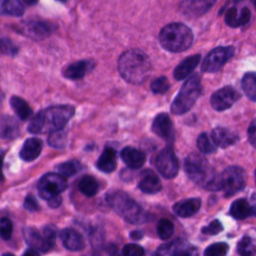

In [12]:
# level_dimensionsと組み合わせても使えそう
levels = sample_slide.level_dimensions

x = int(levels[0][0] / 2)
y = int(levels[0][1] / 2)

sample_slide.read_region((x, y), 0, (256, 256))

In [13]:
# ダウンサンプル係数を与えると、最適なレベルを返す
sample_slide.get_best_level_for_downsample(16.0)

4

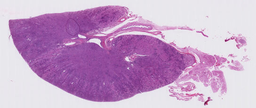

In [14]:
# サムネイルの最大サイズを(w, h)のタプルで指定して表示
sample_slide.get_thumbnail((256, 256))

## Wrapping a PIL Image

In [20]:
# WSIの場合はOpenSlideを、その他のタイプの画像はImagaSlideを返す
path = '../../../../input/sample.ndpi'
sample_slide = openslide.open_slide(path)

## Deep Zoom support
* OpenSlide Pythonはスライドオブジェクトから個々のDeep Zoomタイルを生成する機能を提供する
* WSIをDeep Zoomや同様のフォーマットに変換することなく、WSIをWebブラウザで表示するのに便利

In [21]:
# Deep Zoom imageを生成
# tile_size + 2 * overlapが2の累乗である必要がある
dz_image = DeepZoomGenerator(sample_slide, 
                            tile_size=254, # default
                            overlap=1, # default
                            limit_bounds=False # default
                            )

In [22]:
# Deep Zoom imageのレベルを確認
dz_image.level_count

19

In [18]:
# Deep Zoom imageの枚数を確認
dz_image.tile_count

171033

In [19]:
# 各レベルの(tile_x, tile_y)タプルのリストを返す
dz_image.level_tiles

((1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (5, 2),
 (9, 4),
 (18, 8),
 (35, 15),
 (69, 30),
 (138, 59),
 (275, 117),
 (549, 233))

In [96]:
# 各レベルの(pixels_x, pixels_y)タプルのリストを返す
dz_image.level_dimensions

((1, 1),
 (2, 1),
 (3, 1),
 (5, 2),
 (9, 4),
 (17, 8),
 (34, 15),
 (68, 29),
 (136, 58),
 (272, 116),
 (544, 231),
 (1088, 462),
 (2176, 924),
 (4352, 1848),
 (8704, 3696),
 (17408, 7392),
 (34816, 14784),
 (69632, 29568),
 (139264, 59136))

In [115]:
# Deep Zoom .dziファイルのXMLメタデータを含む文字列を返す：png or jpeg
dz_image.get_dzi(format='png')

'<Image Format="png" Overlap="1" TileSize="254" xmlns="http://schemas.microsoft.com/deepzoom/2008"><Size Height="59136" Width="139264" /></Image>'

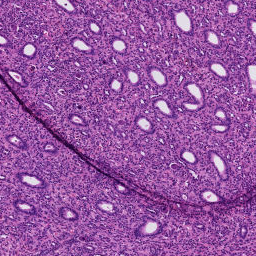

In [125]:
# 指定したレベル（level_tilesのリストを参照）の行、列のタイル画像をRGB形式で返す
rgb_image = dz_image.get_tile(14, (9, 4))
rgb_image

In [127]:
# 指定されたタイルに対応するOpenSlide.read_region()の引数を返す
tile_coordistanes = dz_image.get_tile_coordinates(14, (9, 4))
tile_coordistanes

((36560, 16240), 4, (256, 256))

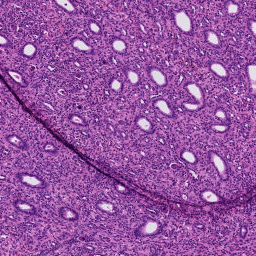

In [130]:
location = tile_coordistanes[0]
level = tile_coordistanes[1]
size = tile_coordistanes[2]

sample_slide.read_region(location, level, size)

In [131]:
# 指定されたタイルの（pixels_x, pixels_y）タプルを返す
dz_image.get_tile_dimensions(14, (9, 4))

(256, 256)